In [47]:
import pandas as pd
from datetime import datetime
import numpy as np
import json
import glob
import keras
from datetime import timedelta
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Dropout
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import json
import seaborn as sns
%matplotlib inline

- Clean notebook to be only new 
- Be able to merge train features and train targets
- same with test
- be able to then split and run program
- test for overfit
- create additional features (business/extra features from swing/ extra features from bugs)
- run reviews for NLP

In [98]:
yelp_business = []
with open('./yelp_dataset/business.json') as data_file:    
    for line in data_file:
        data = json.loads(line)
        yelp_business.append(data)

In [131]:
df_yelp_business = pd.DataFrame(yelp_business)

In [132]:
df_yelp_business.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,"4855 E Warner Rd, Ste B9","{'AcceptsInsurance': True, 'ByAppointmentOnly'...",FYWN1wneV18bWNgQjJ2GNg,"[Dentists, General Dentistry, Health & Medical...",Ahwatukee,"{'Friday': '7:30-17:00', 'Tuesday': '7:30-17:0...",1,33.330690,-111.978599,Dental by Design,,85044,22,4.0,AZ
1,3101 Washington Rd,"{'BusinessParking': {'garage': False, 'street'...",He-G7vWjzVUysIKrfNbPUQ,"[Hair Stylists, Hair Salons, Men's Hair Salons...",McMurray,"{'Monday': '9:00-20:00', 'Tuesday': '9:00-20:0...",1,40.291685,-80.104900,Stephen Szabo Salon,,15317,11,3.0,PA
2,"6025 N 27th Ave, Ste 1",{},KQPW8lFf1y5BT2MxiSZ3QA,"[Departments of Motor Vehicles, Public Service...",Phoenix,{},1,33.524903,-112.115310,Western Motor Vehicle,,85017,18,1.5,AZ
3,"5000 Arizona Mills Cr, Ste 435","{'BusinessAcceptsCreditCards': True, 'Restaura...",8DShNS-LuFqpEWIp0HxijA,"[Sporting Goods, Shopping]",Tempe,"{'Monday': '10:00-21:00', 'Tuesday': '10:00-21...",0,33.383147,-111.964725,Sports Authority,,85282,9,3.0,AZ
4,581 Howe Ave,"{'Alcohol': 'full_bar', 'HasTV': True, 'NoiseL...",PfOCPjBrlQAnz__NXj9h_w,"[American (New), Nightlife, Bars, Sandwiches, ...",Cuyahoga Falls,"{'Monday': '11:00-1:00', 'Tuesday': '11:00-1:0...",1,41.119535,-81.475690,Brick House Tavern + Tap,,44221,116,3.5,OH


In [253]:
df_yelp_business_less = df_yelp_business[['business_id', 'postal_code', 'review_count']]

In [254]:
df_yelp_business_less['average_review_count'] = df_yelp_business_less.groupby('postal_code')['review_count'].transform(np.mean)

/Users/kylehoward/Desktop/Thinkful/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [255]:
df_yelp_business_less['business_count'] = df_yelp_business_less.groupby('postal_code')['business_id'].transform('count')

/Users/kylehoward/Desktop/Thinkful/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [256]:
df_yelp_business_less['zip_review_count'] = df_yelp_business_less.groupby('postal_code')['review_count'].transform(np.sum)

/Users/kylehoward/Desktop/Thinkful/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [257]:
df_yelp_business_less['average_review_std'] = df_yelp_business_less.groupby('postal_code')['review_count'].transform(np.std)

/Users/kylehoward/Desktop/Thinkful/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [258]:
df_yelp_business_less['average_review_max'] = df_yelp_business_less.groupby('postal_code')['review_count'].transform(np.max)

/Users/kylehoward/Desktop/Thinkful/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [259]:
df_yelp_business_less['average_review_min'] = df_yelp_business_less.groupby('postal_code')['review_count'].transform(np.min)

/Users/kylehoward/Desktop/Thinkful/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [260]:
df_yelp_business_less['average_review_variance'] = df_yelp_business_less.groupby('postal_code')['review_count'].transform(np.max) - df_yelp_business_less.groupby('postal_code')['review_count'].transform(np.min)

/Users/kylehoward/Desktop/Thinkful/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [261]:
df_yelp_business_less = df_yelp_business_less.sort_values('postal_code',ascending=False)

In [262]:
df_yelp_business_less = df_yelp_business_less.set_index('postal_code')

In [263]:
df_yelp_business_less[42883:42950]

,business_id,review_count,average_review_count,business_count,zip_review_count,average_review_std,average_review_max,average_review_min,average_review_variance
postal_code,,,,,,,,,
98145,eyYtakIp6Zu5-ZrXQNs4PQ,3,3.000000,1,3,NaN,3,3,0
95966,bujMV3UPks8INgBnjV9gcw,110,110.000000,1,110,NaN,110,110,0
95308,yHdYGeVbM8XFdLRS9-LJzw,3,3.000000,1,3,NaN,3,3,0
95224,jTN3ZnlS6val3UtOtcuKUA,3,3.000000,1,3,NaN,3,3,0
94901,9kk5C_BW7rdBwtCJiSiBtw,214,214.000000,1,214,NaN,214,214,0
94565,Xp2Owe_MZcRiCFZJuyarVg,8,8.000000,1,8,NaN,8,8,0
94066,AZ4JC4-YOIWhOOOSo0AcMw,6,6.000000,1,6,NaN,6,6,0
93612,YkbV9Bn9Ohl4vlP-wesvgQ,51,51.000000,1,51,NaN,51,51,0
93449,BhzrquydjzzND2wE4l5PcA,9,9.000000,1,9,NaN,9,9,0


In [264]:
df_yelp_business_less = df_yelp_business_less.iloc[42883:-623]

In [265]:
df_yelp_business_less.head()

,business_id,review_count,average_review_count,business_count,zip_review_count,average_review_std,average_review_max,average_review_min,average_review_variance
postal_code,,,,,,,,,
98145,eyYtakIp6Zu5-ZrXQNs4PQ,3,3.0,1,3,NaN,3,3,0
95966,bujMV3UPks8INgBnjV9gcw,110,110.0,1,110,NaN,110,110,0
95308,yHdYGeVbM8XFdLRS9-LJzw,3,3.0,1,3,NaN,3,3,0
95224,jTN3ZnlS6val3UtOtcuKUA,3,3.0,1,3,NaN,3,3,0
94901,9kk5C_BW7rdBwtCJiSiBtw,214,214.0,1,214,NaN,214,214,0


In [266]:
mx = df_yelp_business_less['business_count'].max()
mn = df_yelp_business_less['business_count'].min()
diff = mx - mn
bus_mean = df_yelp_business_less['business_count'].mean()
std = df_yelp_business_less['business_count'].std()

In [270]:
mx_review = df_yelp_business_less['zip_review_count'].max()
mn_review = df_yelp_business_less['zip_review_count'].min()
diff_review = mx_review - mn_review
mean_review = df_yelp_business_less['zip_review_count'].mean()
std_review = df_yelp_business_less['zip_review_count'].std()

(array([ 36295.,  41781.,  20352.,  11727.,   9182.,   6715.,   2044.,
             0.,      0.,   2965.]),
 array([  1.00000000e+00,   2.97400000e+02,   5.93800000e+02,
          8.90200000e+02,   1.18660000e+03,   1.48300000e+03,
          1.77940000e+03,   2.07580000e+03,   2.37220000e+03,
          2.66860000e+03,   2.96500000e+03]),
 <a list of 10 Patch objects>)

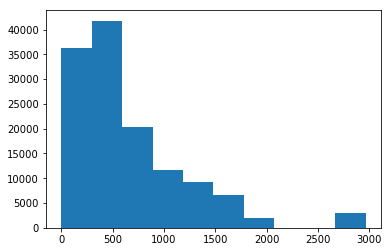

In [247]:
plt.hist(df_yelp_business_less['business_count'])

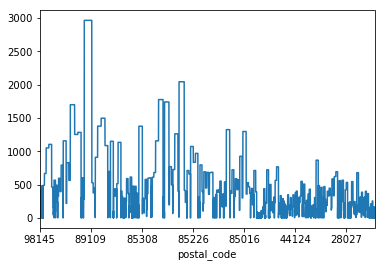

In [248]:
df_yelp_business_less['business_count'].plot()

(array([ 107871.,   16481.,    3744.,       0.,       0.,       0.,
              0.,       0.,       0.,    2965.]),
 array([  3.00000000e+00,   4.89371000e+04,   9.78712000e+04,
          1.46805300e+05,   1.95739400e+05,   2.44673500e+05,
          2.93607600e+05,   3.42541700e+05,   3.91475800e+05,
          4.40409900e+05,   4.89344000e+05]),
 <a list of 10 Patch objects>)

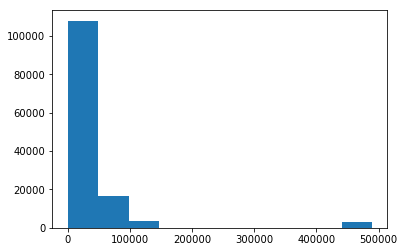

In [268]:
# I'm guessing the vegas strip is the outlier
plt.hist(df_yelp_business_less['zip_review_count'])

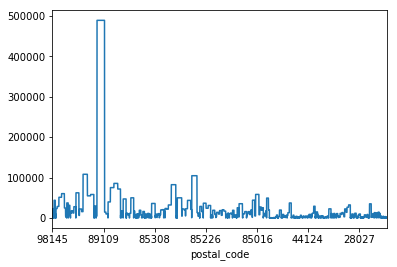

In [269]:
df_yelp_business_less['zip_review_count'].plot()

In [249]:
print(mx)
print(mn)
print(diff)
print(bus_mean)
print(std)

2965
1
2964
665.06783101
585.719523461


In [271]:
print(mx_review)
print(mn_review)
print(diff_review)
print(mean_review)
print(std_review)

489344
3
489341
33598.9776516
73612.081861


In [272]:
df_yelp_business_less.head(50)

,business_id,review_count,average_review_count,business_count,zip_review_count,average_review_std,average_review_max,average_review_min,average_review_variance
postal_code,,,,,,,,,
98145,eyYtakIp6Zu5-ZrXQNs4PQ,3,3.000000,1,3,NaN,3,3,0
95966,bujMV3UPks8INgBnjV9gcw,110,110.000000,1,110,NaN,110,110,0
95308,yHdYGeVbM8XFdLRS9-LJzw,3,3.000000,1,3,NaN,3,3,0
95224,jTN3ZnlS6val3UtOtcuKUA,3,3.000000,1,3,NaN,3,3,0
94901,9kk5C_BW7rdBwtCJiSiBtw,214,214.000000,1,214,NaN,214,214,0
94565,Xp2Owe_MZcRiCFZJuyarVg,8,8.000000,1,8,NaN,8,8,0
94066,AZ4JC4-YOIWhOOOSo0AcMw,6,6.000000,1,6,NaN,6,6,0
93612,YkbV9Bn9Ohl4vlP-wesvgQ,51,51.000000,1,51,NaN,51,51,0
93449,BhzrquydjzzND2wE4l5PcA,9,9.000000,1,9,NaN,9,9,0


In [ ]:
#----------------------------

In [48]:
list_of_file_names = glob.glob("./zip_2/*.csv")

In [49]:
read_data_list_2 = []
fail_list = []
for i, data in enumerate(list_of_file_names):
    try:
        data = pd.read_csv(data)
        #data = unicode(data, errors='replace')
        read_data_list_2.append(data)
    except UnicodeDecodeError:
        fail_list.append(i)
#read_data_list
#fail_list
list_of_file_names_org = list_of_file_names

In [50]:
fail_list

[3]

In [51]:
for x in fail_list:
    del list_of_file_names[x]

In [52]:
list_of_file_names[3]

'./zip_2/Zip_Listings_PriceCut_SeasAdj_AllHomes.csv'

In [53]:
# build loop for data we can work with. Only dates and zip
def build_useful_df(data_list):
    useful_df = []
    for dataset in range(len(data_list)):
        data = read_data_list_2[dataset]
        region_name = data['RegionName']
        region_name = region_name.astype(str)
        new_df = data.select_dtypes(include=['float64'])
        new_df.insert(loc=0, column='RegionName', value=region_name) 
        new_df = new_df.sort_values('RegionName',ascending=False)
        new_df = new_df.set_index('RegionName')
        useful_df.append(new_df)
    return useful_df

In [54]:
useful_df = build_useful_df(read_data_list_2)


In [55]:
sixteen_list = []
for i, file in enumerate(useful_df):
    if len(file) >= 10000:
        sixteen_list.append(i)

In [56]:
len_list = []
for file in useful_df:
    file_2 = len(file)
    len_list.append(file_2)

In [57]:
len(sixteen_list)

30

(array([ 19.,  11.,   4.,   5.,   0.,   0.,   3.,   1.,   0.,   5.,   2.,
          0.,   8.,   4.,   0.,   0.,   3.,   2.,   2.,  14.]),
 array([  8.00000000e+00,   8.02550000e+02,   1.59710000e+03,
          2.39165000e+03,   3.18620000e+03,   3.98075000e+03,
          4.77530000e+03,   5.56985000e+03,   6.36440000e+03,
          7.15895000e+03,   7.95350000e+03,   8.74805000e+03,
          9.54260000e+03,   1.03371500e+04,   1.11317000e+04,
          1.19262500e+04,   1.27208000e+04,   1.35153500e+04,
          1.43099000e+04,   1.51044500e+04,   1.58990000e+04]),
 <a list of 20 Patch objects>)

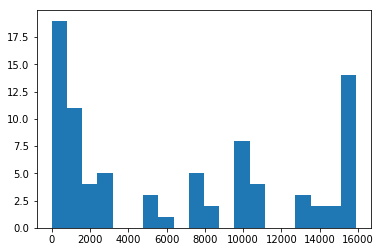

In [58]:
plt.hist(len_list, bins=20)

In [59]:
def build_feature_list(good_range, df_list):
    year_list = ['2011', '2012', '2013', '2014', '2015', '2016']
    feature_df_list = []
    bugs = []
    for num in good_range:
        df = df_list[num]
        try:
            df = df.loc[:, '1990-01':'2016-12']
            features = pd.DataFrame()
            for i, year in enumerate(year_list):
                mean = df.loc[:, year + '-01': year + '-12'].mean(axis=1)
                features[year + '_mean'] = mean
                std = df.loc[:, year + '-01': year + '-12'].std(axis=1)
                features[year + '_std'] = std
                mn = df.loc[:, year + '-01': year + '-12'].min(axis=1)
                features[year + '_min'] = mn
                mx = df.loc[:, year + '-01': year + '-12'].max(axis=1)
                features[year + '_max'] = mx
                features[year + '_swing'] = mx - mn
                change = df[year + '-12'] - df[year + '-01']
                features[year + '_change'] = change
                if i > 0:
                    yoy = features[year + '_mean'] / df.loc[:, year_list[i - 1] + '-01': year_list[i - 1] + '-12'].mean(axis=1)
                    features[year + '_yoy'] = yoy
                    features[year + '_gain'] = np.where(features[year + '_yoy']>1, 1, 0)
                    
                    #big swing and gain, big swing and loss, big swing and big gain, big swing and big loss
            feature_df_list.append(features)
        except:
            bugs.append(num)
    return feature_df_list, bugs

In [60]:
def build_feature_list_add(good_range, df_list, pure_feature_list):
    year_list = ['2011', '2012', '2013', '2014', '2015', '2016']
    feature_df_list = []
    bugs = []
    for feature in pure_feature_list:
        df = df_list[feature]
        feature_df_list.append(df)
    for num in good_range:
        df = df_list[num]
        try:
            df = df.loc[:, '2011-01':'2016-12']
            features = pd.DataFrame()
            for i, year in enumerate(year_list):
                mean = df.loc[:, year + '-01': year + '-12'].mean(axis=1)
                features[year + '_mean'] = mean
                std = df.loc[:, year + '-01': year + '-12'].std(axis=1)
                features[year + '_std'] = std
                mn = df.loc[:, year + '-01': year + '-12'].min(axis=1)
                features[year + '_min'] = mn
                mx = df.loc[:, year + '-01': year + '-12'].max(axis=1)
                features[year + '_max'] = mx
                features[year + '_swing'] = mx - mn
                change = df[year + '-12'] - df[year + '-01']
                features[year + '_change'] = change
                if i > 0:
                    yoy = features[year + '_mean'] / df.loc[:, year_list[i - 1] + '-01': year_list[i - 1] + '-12'].mean(axis=1)
                    features[year + '_yoy'] = yoy
                    features[year + '_gain'] = np.where(features[year + '_yoy']>1, 1, 0)
                    
            feature_df_list.append(features)
        except:
            bugs.append(num)
    return feature_df_list, bugs

In [61]:
def build_feature_list_bugs(good_range, df_list):
    year_list = ['2011', '2012', '2013', '2014', '2015', '2016']
    feature_df_list = []
    bugs = []
    for num in good_range:
        for year in year_list:
            for month in month_list:
                df = df_list[num]
                df = df.loc[:, '2011-01':year+"-"+month]
                features = pd.DataFrame()
                for i, year in enumerate(year_list):
                    try:
                        mean = df.loc[:, year + '-01': year + '-12'].mean(axis=1)
                        features[year + '_mean'] = mean
                        std = df.loc[:, year + '-01': year + '-12'].std(axis=1)
                        features[year + '_std'] = std
                        mn = df.loc[:, year + '-01': year + '-12'].min(axis=1)
                        features[year + '_min'] = mn
                        mx = df.loc[:, year + '-01': year + '-12'].max(axis=1)
                        features[year + '_max'] = mx
                        features[year + '_swing'] = mx - mn
                        change = df[year + '-12'] - df[year + '-01']
                        features[year + '_change'] = change
                        if i > 0:
                            yoy = features[year + '_mean'] / df.loc[:, year_list[i - 1] + '-01': year_list[i - 1] + '-12'].mean(axis=1)
                            features[year + '_yoy'] = yoy
                            features[year + '_gain'] = np.where(features[year + '_yoy']>1, 1, 0)
                    
                        feature_df_list.append(features)
            except:
                mean = df.loc[:, year + '-01': year + '-12'].mean(axis=1)
                features[year + '_mean'] = mean
                std = df.loc[:, year + '-01': year + '-12'].std(axis=1)
                features[year + '_std'] = std
                mn = df.loc[:, year + '-01': year + '-12'].min(axis=1)
                features[year + '_min'] = mn
                mx = df.loc[:, year + '-01': year + '-12'].max(axis=1)
                features[year + '_max'] = mx
                features[year + '_swing'] = mx - mn
                #change = df[year + '-12'] - df[year + '-01']
                features[year + '_change'] = change
                if i > 0:
                    yoy = features[year + '_mean'] / df.loc[:, year_list[i - 1] + '-01': year_list[i - 1] + '-12'].mean(axis=1)
                    features[year + '_yoy'] = yoy
                    features[year + '_gain'] = np.where(features[year + '_yoy']>1, 1, 0)
                
                feature_df_list.append(features)
        #    bugs.append(num)
    return feature_df_list, bugs

IndentationError: unexpected unindent (<ipython-input-61-44fc68f0f1d7>, line 30)

In [62]:
len(useful_df)
for num in range(len(useful_df)):
    useful_df[num].dropna(inplace=True)

In [63]:
sixteen_doc_features, bugs = build_feature_list(sixteen_list, useful_df)

In [64]:
bugs

[1, 2, 52, 60, 61, 62, 64, 65, 68, 70, 71, 72, 74, 75, 76, 77, 80, 81]

In [65]:
sixteen_good = []
for six in sixteen_list:
    if six not in bugs and six != 23:
        sixteen_good.append(six)
    

In [66]:
sixteen_good

[3, 14, 26, 53, 54, 55, 58, 66, 69, 73, 82]

In [67]:
target_data = useful_df[23]

In [68]:
final_data_list = []
for i, data in enumerate(useful_df):
    if i in sixteen_good:
        final_data_list.append(data)

In [69]:
final_data_list[-10]

,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
RegionName,,,,,,,,,,,,,,,,,,,,,
99709,234950.0,240450.0,249950.0,252475.0,259450.0,254500.0,248500.0,249500.0,243000.0,246450.0,...,199900.0,218700.0,217450.0,214900.0,213450.0,214950.0,214900.0,196000.0,176650.0,191745.5
99705,210000.0,225950.0,225000.0,239900.0,244250.0,244950.0,240500.0,239900.0,239900.0,235000.0,...,234900.0,234900.0,234900.0,234950.0,239325.0,235000.0,232000.0,232000.0,219900.0,219900.0
99701,199900.0,179000.0,179500.0,182500.0,182500.0,184500.0,184950.0,198400.0,193500.0,191500.0,...,179950.0,181250.0,180000.0,169000.0,169000.0,168997.5,169000.0,150000.0,150000.0,164500.0
99669,300000.0,302500.0,320000.0,310000.0,299000.0,279000.0,273900.0,259000.0,259000.0,245000.0,...,237500.0,254900.0,268900.0,267750.0,267250.0,266000.0,270000.0,275000.0,259000.0,259450.0
99654,235000.0,230000.0,235000.0,235000.0,236000.0,238450.0,238000.0,236000.0,235000.0,225000.0,...,285000.0,289900.0,295000.0,298000.0,295000.0,289900.0,289950.0,289000.0,289450.0,293025.0
99645,237900.0,237500.0,237500.0,236250.0,239900.0,238000.0,237575.0,237500.0,239000.0,235000.0,...,282500.0,279950.0,279900.0,286900.0,284950.0,289700.0,293000.0,289500.0,279900.0,283950.0
99611,215000.0,215000.0,230000.0,225000.0,225000.0,219000.0,235000.0,235000.0,229999.0,234500.0,...,224000.0,229000.0,229937.5,229950.0,230000.0,239000.0,239000.0,239900.0,237450.0,236185.0
99603,257000.0,259000.0,260000.0,266750.0,275000.0,275000.0,272450.0,268000.0,269000.0,275000.0,...,275000.0,290000.0,293750.0,299000.0,299450.0,315000.0,310000.0,299000.0,299000.0,287500.0
99577,299000.0,299983.0,295000.0,309450.0,310000.0,324900.0,319400.0,313450.0,314950.0,310000.0,...,350000.0,350000.0,361500.0,359950.0,369000.0,359850.0,360000.0,365000.0,352900.0,367000.0


In [70]:
len(sixteen_doc_features)

12

In [71]:
list_of_file_names[77]

'./zip_2/Zip_Zri_AllHomesPlusMultifamily_Summary.csv'

In [72]:
# Docs that don't need feature engineering. They are already aggregates
pure_features = [0, 71, 75, 77, 79, 81]
#sixteen_doc_features[1].head()

In [73]:
useful_df[52].head()

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,...,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01
RegionName,,,,,,,,,,,,,,,,,,,,,
99901,162.0,162.0,162.0,162.0,162.0,162.0,162.0,162.0,162.0,162.0,...,161.0,162.0,162.0,162.0,162.0,162.0,162.0,161.0,161.0,161.0
99362,73.0,74.0,74.0,75.0,76.0,76.0,76.0,76.0,75.0,75.0,...,127.0,127.0,127.0,128.0,128.0,129.0,129.0,129.0,130.0,130.0
99354,71.0,72.0,73.0,73.0,73.0,72.0,72.0,72.0,72.0,73.0,...,114.0,114.0,114.0,114.0,115.0,115.0,115.0,115.0,115.0,115.0
99353,67.0,67.0,66.0,66.0,66.0,66.0,65.0,66.0,65.0,66.0,...,112.0,112.0,112.0,113.0,114.0,114.0,113.0,114.0,114.0,114.0
99352,71.0,71.0,72.0,72.0,73.0,72.0,73.0,73.0,73.0,73.0,...,114.0,115.0,115.0,115.0,115.0,115.0,115.0,116.0,116.0,116.0


In [74]:
len(sixteen_doc_features)
for num in range(len(sixteen_doc_features)):
    sixteen_doc_features[num].dropna(inplace=True)

In [75]:
# Merging all dfs into one. Merging on indez which is zipcode. I was hoping for inner join but it looks like
# There are many zipcodes that only exist in certain dfs. Im hoping that reducing them to metro areas will fix this
def merge_dataframes(feature_df_list):
    df_1 = feature_df_list[0]
    for df in feature_df_list[1:]:
        df_1 = pd.merge(df_1, df, left_index=True, right_index=True, how='inner')
    
    return df_1

In [76]:
X_16 = merge_dataframes(sixteen_doc_features)

In [77]:
X_16.dropna(inplace=True)

In [78]:
X_16.isnull().sum().sum()

0

In [79]:
X_16.head()

,2011_mean_x,2011_std_x,2011_min_x,2011_max_x,2011_swing_x,2011_change_x,2012_mean_x,2012_std_x,2012_min_x,2012_max_x,...,2015_yoy_y,2015_gain_y,2016_mean_y,2016_std_y,2016_min_y,2016_max_y,2016_swing_y,2016_change_y,2016_yoy_y,2016_gain_y
RegionName,,,,,,,,,,,,,,,,,,,,,
99223,17.470575,2.151552,13.157744,19.884243,6.726499,0.772589,14.925278,2.807599,10.810474,18.942333,...,1.052054,1,0.856167,0.016656,0.826,0.874,0.048,0.048,1.050296,1
99218,17.800899,2.953572,11.325792,21.163550,9.837757,2.571792,13.344549,4.715423,2.777553,18.333317,...,1.031048,1,0.813500,0.015843,0.786,0.834,0.048,0.048,1.057409,1
99217,16.730506,2.461923,11.315092,20.255591,8.940499,-2.257172,14.715073,2.405299,11.693415,20.439508,...,1.057155,1,0.868000,0.011817,0.846,0.882,0.036,0.036,1.035182,1
99212,15.310737,2.952748,11.290826,20.327481,9.036655,0.120253,14.234445,3.086468,8.897363,21.014987,...,1.048559,1,0.905833,0.013306,0.878,0.918,0.040,0.040,1.044389,1
99208,12.623406,1.774491,9.810553,15.617595,5.807042,1.675172,13.064704,1.348408,10.896670,15.656514,...,1.040598,1,0.850667,0.014853,0.824,0.866,0.042,0.042,1.048049,1


In [80]:
df_yelp_business = df_yelp_business.sort_values('postal_code',ascending=False)
df_yelp_business = df_yelp_business.set_index('postal_code')

NameError: name 'df_yelp_business' is not defined

In [44]:
df_yelp_business_merge = pd.DataFrame()
df_yelp_business_merge['review_count'] = df_yelp_business['review_count']

In [45]:
df_yelp_business_merge.head()

,review_count
postal_code,
YO22 5LY,4
YO22 5AL,4
YO22 4RG,3
YO22 4NT,3
YO22 4JT,15


In [924]:
df_yelp_business_merge.tail(50)

,review_count,zeroes


In [81]:
X_16.index

Index(['99223', '99218', '99217', '99212', '99208', '99207', '99206', '99205',
       '99203', '99202',
       ...
       '1069', '1057', '1056', '1040', '1028', '1027', '1020', '1013', '1002',
       '1001'],
      dtype='object', name='RegionName', length=1048)

In [82]:
# Merging the Zillow data and the yelp zipcodes 
df_2 = pd.merge(X_16, df_yelp_business_merge, left_index=True, right_index=True, how='inner')

NameError: name 'df_yelp_business_merge' is not defined

In [83]:
df_2.head()

NameError: name 'df_2' is not defined

In [84]:
def build_feature_list_swing(good_range, df_list, year_list, month_list):
    feature_df_list = []
    bugs = []
    for num in good_range:
        for year in year_list:
            for month in month_list:
                future_time = month + timedelta(days=6*31)
                df = df_list[num]
                df = df.loc[:, '2011-01':year+"-"+month]
                features = pd.DataFrame()
                for i, year in enumerate(year_list):
                    try:
                        mean = df.loc[:, year + '-01': year + '-12'].mean(axis=1)
                        features[year + '_mean'] = mean
                        std = df.loc[:, year + '-01': year + '-12'].std(axis=1)
                        features[year + '_std'] = std
                        mn = df.loc[:, year + '-01': year + '-12'].min(axis=1)
                        features[year + '_min'] = mn
                        mx = df.loc[:, year + '-01': year + '-12'].max(axis=1)
                        features[year + '_max'] = mx
                        features[year + '_swing'] = mx - mn
                        change = df[year + '-12'] - df[year + '-01']
                        features[year + '_change'] = change
                        yoy = features[year + '_mean'] / df.loc[:, year_list[i - 1] + '-01': year_list[i - 1] + '-12'].mean(axis=1)
                        features[year + '_yoy'] = yoy
                        features[year + '_gain'] = np.where(features[year + '_yoy']>1, 1, 0)
                        mean_yoy = features[year + '_yoy'].mean()
                        features[year + '_yoy_pos'] = np.where(features[year + '_yoy']>mean_yoy, 1, 0)
                        big_yoy = features[year + '_yoy'].std() + mean_yoy
                        features[year + '_yoy_big'] = np.where(features[year + '_yoy']>big_yoy, 1, 0)
                        features[year + '_yoy_neg'] = np.where(features[year + '_yoy']<mean_yoy, 1, 0)
                        big_loss = mean_yoy - features[year + '_yoy'].std() 
                        features[year + '_yoy_loss_big'] = np.where(features[year + '_yoy']<big_loss, 1, 0)
                        mean_swing = features[year + '_swing'].mean()
                        features[year + '_swing_pos'] = np.where(features[year + '_swing']>mean_swing, 1, 0)
                        big_swing = features[year + '_swing'].std() + mean_swing
                        features[year + '_swing_big'] = np.where(features[year + '_swing']>big_swing, 1, 0)
                        features[year + '_swing_neg'] = np.where(features[year + '_swing']<mean_swing, 1, 0)
                        swing_big_loss = mean_swing - features[year + '_swing'].std() 
                        features[year + '_swing_loss_big'] = np.where(features[year + '_swing']<swing_big_loss, 1, 0)
                        feature_df_list.append(features)
                    except:
                        bugs.append(num)
    return feature_df_list, bugs

In [85]:
def make_features(df, past_time_string, now_string):
    #df.dropna(inplace=True)
    features = pd.DataFrame()
    mean = df.loc[:, past_time_string : now_string].mean(axis=1)
    features['mean'] = mean
    std = df.loc[:, past_time_string : now_string].std(axis=1)
    features['std'] = std
    mn = df.loc[:, past_time_string : now_string].min(axis=1)
    features['min'] = mn
    mx = df.loc[:, past_time_string : now_string].max(axis=1)
    features['max'] = mx
    features['swing'] = mx - mn
    change = df[now_string] - df[past_time_string]
    features['change'] = change
    #features.dropna(inplace=True)
    #features = features.set_index(df.index)
    #print(features.iloc[1, :])
    return features
    
# List of data frames only on one now_time
def make_modeling_data(df_list, df_for_target, now_string):
    df_one = pd.DataFrame()
    now_time = pd.to_datetime(now_string)
    now_value = df_for_target[now_string]
    #future_time = now_time + timedelta(days=6*31)
    #future_time_string= future_time.strftime("%Y-%m")
    #future_value = df_for_target[future_time_string]
    #target = future_value/now_value
    
    past_time = now_time - timedelta(days=6*31)
    past_time_string= past_time.strftime("%Y-%m")
    df_to_use_for_features_org= df_list[0].loc[:, :now_string]
    features_org = make_features(df_to_use_for_features_org, past_time_string, now_string)
    df_one = pd.merge(df_one, features_org, left_index=True, right_index=True, how = 'right')
    for i, df in enumerate(df_list[1:]):
        ind = str(i)
        columns = df.columns
        if '2014-01' in columns and '2015-01' in columns and '2016-01' in columns and '2017-01' in columns:
            df_to_use_for_features= df.loc[:, :now_string]
            features = make_features(df_to_use_for_features, past_time_string, now_string)
            df_one = df_one.append(features)
            
    #now_time = pd.to_datetime(now_string)
    #now_value = df_for_target[now_string]
    future_time = now_time + timedelta(days=6*31)
    future_time_string= future_time.strftime("%Y-%m")
    future_value = df_for_target[future_time_string]
    target = future_value/now_value

    
    return df_one, target




test_features, test_targets = make_modeling_data(final_data_list, target_data, "2017-01")
train_features, train_targets = make_modeling_data(final_data_list, target_data, "2016-07")
#df = useful_df[num]
#columns = df.columns
for year in ["2015","2016"]:
    for month in ["01","07"]:
            new_time = year+"-"+month
            #if '2014-01' in columns and '2015-01' in columns and '2016-01' in columns and '2017-01' in columns:
                 #   extra_train_features, extra_train_targets = make_modeling_data(df, new_time)
                  #  train_features = train_features.append(extra_train_features)
                   # train_targets = train_targets.append(extra_train_targets)
            extra_train_features, extra_train_targets = make_modeling_data(final_data_list, target_data, new_time)
            extra_train_features.dropna(inplace=True)
            train_features = train_features.append(extra_train_features)
            train_targets = train_targets.append(extra_train_targets)

In [97]:
train_features.shape
train_features[19800:19900]

,mean,std,min,max,swing,change
RegionName,,,,,,
98004,4.26875,1.606686,2.18,6.68,4.50,2.19
98003,8.71375,6.302820,0.92,14.96,14.04,-9.52
98002,2.52750,1.294524,0.65,4.29,3.64,-2.54
98001,1.15250,0.282628,0.78,1.75,0.97,0.04
97760,13.54375,4.165254,6.89,18.71,11.82,-10.40
97759,14.60500,3.318963,11.36,20.34,8.98,-3.18
97756,2.45750,0.731413,1.49,3.56,2.07,1.30
97739,6.02250,1.791940,3.43,8.51,5.08,5.08
97707,10.20500,3.031963,6.47,14.38,7.91,7.24


In [59]:
def make_features(df):
    features = pd.DataFrame()
    
    features["my_first_feature"] = df.iloc[:,-1]/df.iloc[:,-2]
    features = features.set_index(df.index)
    return features
    
# List of data frames only on one now_time
def make_modeling_data(df_list, df_for_target, now_string):
    df_one = pd.DataFrame()
    for df in df_list:
        columns = df.columns
        if '2014-01' in columns and '2015-01' in columns and '2016-01' in columns and '2017-01' in columns:
            df_to_use_for_features= df.loc[:, :now_string]
            features = make_features(df_to_use_for_features)
            df_one = pd.merge(df_one, features, left_index=True, right_index=True, how = 'right')
    
    now_time = pd.to_datetime(now_string)
    now_value = df_for_target[now_string]
    future_time = now_time + timedelta(days=6*31)
    future_time_string= future_time.strftime("%Y-%m")
    future_value = df_for_target[future_time_string]
    target = future_value/now_value

    
    return df_one, target




test_features, test_targets = make_modeling_data(useful_df, useful_df[23], "2017-01")
train_features, train_targets = make_modeling_data(useful_df, useful_df[23], "2016-07")
df = useful_df[num]
columns = df.columns
for year in ["2015","2016"]:
    for month in ["01","07"]:
            new_time = year+"-"+month
                #if '2014-01' in columns and '2015-01' in columns and '2016-01' in columns and '2017-01' in columns:
                 #   extra_train_features, extra_train_targets = make_modeling_data(df, new_time)
                  #  train_features = train_features.append(extra_train_features)
                   # train_targets = train_targets.append(extra_train_targets)
            extra_train_features, extra_targets = make_modeling_data(useful_df, useful_df[23], new_time)
            train_features = train_features.append(extra_train_features)
            train_targets = train_targets.append(extra_train_targets)

In [61]:
train_features.shape

(74265, 58)

In [47]:
len(windows[1])

10521

In [42]:
len(windows[2])

10521

In [ ]:
window_list

In [80]:
y = create_y_ratio(read_data_list_2[23])

KeyError: 1513.2575757575798

In [70]:
len(read_data_list_2[23])

10521

In [67]:
y.head()

,RegionName,y
0,10025,0.950185
1,60657,NaN
2,10023,0.995899
3,77494,1.031827
4,75070,0.981885


In [50]:
X_16_df = pd.merge(X_16, y, right_index=True, left_index=True, how='inner')

NameError: name 'y' is not defined

In [964]:
X_2_df = pd.merge(df_2, y, right_index=True, left_index=True, how='inner')

In [ ]:
# merge train fetaures, train targets, test features, test targets
#X_new = pd.merge(df_2, y, right_index=True, left_index=True, how='inner')

In [966]:
X_2_df.head()

,2011_mean_x,2011_std_x,2011_min_x,2011_max_x,2011_swing_x,2011_change_x,2011_swing_pos_x,2011_swing_big_x,2011_swing_neg_x,2011_swing_loss_big_x,...,2016_yoy_pos_y,2016_yoy_big_y,2016_yoy_neg_y,2016_yoy_loss_big_y,2016_swing_pos_y,2016_swing_big_y,2016_swing_neg_y,2016_swing_loss_big_y,review_count,y
15003,13.663362,3.136821,10.19523,18.892134,8.696905,-2.455884,0,0,1,0,...,0,0,1,0,0,0,1,0,4,1.004622
15003,13.663362,3.136821,10.19523,18.892134,8.696905,-2.455884,0,0,1,0,...,0,0,1,0,0,0,1,0,8,1.004622
15003,13.663362,3.136821,10.19523,18.892134,8.696905,-2.455884,0,0,1,0,...,0,0,1,0,0,0,1,0,39,1.004622
15003,13.663362,3.136821,10.19523,18.892134,8.696905,-2.455884,0,0,1,0,...,0,0,1,0,0,0,1,0,3,1.004622
15003,13.663362,3.136821,10.19523,18.892134,8.696905,-2.455884,0,0,1,0,...,0,0,1,0,0,0,1,0,8,1.004622


In [948]:
X_2.dropna(inplace=True)
X_2.isnull().sum().sum()
X_2.describe()

AttributeError: 'numpy.ndarray' object has no attribute 'dropna'

In [737]:
X_2_df['2016_gain'].sum() / len(X_2_df)

0.9347079037800687

In [818]:
X_16_df.dropna(inplace=True)
X_16_df.isnull().sum().sum()
X_16_df.describe()

,2011_mean_x,2011_std_x,2011_min_x,2011_max_x,2011_swing_x,2011_change_x,2011_swing_pos_x,2011_swing_big_x,2011_swing_neg_x,2011_swing_loss_big_x,...,2016_gain_y,2016_yoy_pos_y,2016_yoy_big_y,2016_yoy_neg_y,2016_yoy_loss_big_y,2016_swing_pos_y,2016_swing_big_y,2016_swing_neg_y,2016_swing_loss_big_y,y
count,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,...,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000
mean,14.281579,2.873584,9.687841,19.192768,9.504927,-1.164982,0.428154,0.149152,0.571846,0.149152,...,0.872685,0.551764,0.156561,0.448236,0.049912,0.360889,0.098265,0.639111,0.021252,1.067475
std,3.122251,1.019149,3.194033,4.072836,3.459762,4.325728,0.494859,0.356273,0.494859,0.356273,...,0.333358,0.497362,0.363422,0.497362,0.217785,0.480305,0.297701,0.480305,0.144236,0.072273
min,5.149246,0.717761,-1.717095,7.217994,2.280413,-23.062877,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.791820
25%,12.116049,2.138989,7.456067,16.480570,7.036975,-3.732543,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.023399
50%,14.286639,2.739566,9.738339,19.012437,9.001742,-0.989435,0.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.061971
75%,16.355682,3.455925,11.863632,21.755320,11.443071,1.592072,1.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.106317
max,25.309110,9.054726,21.888196,38.354467,32.033667,17.008037,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.425089


In [967]:
X_2 = X_2_df.iloc[:, :-1].values
y_2 = X_2_df.iloc[:, -1].values

In [820]:
X_16 = X_16_df.iloc[:, :-1].values
y_16 = X_16_df.iloc[:, -1].values

In [968]:
X_2_df['y'].describe()

count    97745.000000
mean         1.091032
std          0.069050
min          0.884748
25%          1.047925
50%          1.073544
75%          1.123171
max          1.425089
Name: y, dtype: float64

In [828]:
X_16_df['y'].describe()

count    5129.000000
mean        1.067475
std         0.072273
min         0.791820
25%         1.023399
50%         1.061971
75%         1.106317
max         1.425089
Name: y, dtype: float64

In [521]:
X_16_df

array([[  1.98408333e+01,   5.28288568e+00,   1.26100000e+01, ...,
          4.44783710e-02,   1.11710935e+00,   1.00000000e+00],
       [  8.59416667e+00,   2.68156148e+00,   4.90000000e+00, ...,
          3.36152944e-02,   1.16117045e+00,   1.00000000e+00],
       [  9.57916667e+00,   4.12912815e+00,   4.05000000e+00, ...,
          2.08722085e-02,   1.76863352e+00,   1.00000000e+00],
       ..., 
       [  3.84833333e+00,   7.56057457e+00,   3.00000000e-02, ...,
         -1.84320184e-02,   2.15476923e+01,   1.00000000e+00],
       [  7.37000000e+00,   8.97160267e+00,   1.15000000e+00, ...,
          1.24468539e-02,   9.77659456e-01,   0.00000000e+00],
       [  2.06333333e+00,   1.31138604e+00,   6.10000000e-01, ...,
         -1.59529241e-02,   8.84642600e-01,   0.00000000e+00]])

In [774]:
def norm_per_column(X):
    new_array = []
    shape = X.shape
    columns = shape[1]
    for num in range(columns):
        mx = X[:, num].max()
        if mx == 0:
            new_array.append(X[:, num])
        else:
            X[:, num] = X[:, num] / mx
            new_array.append(X[:, num])
    new_array = np.array(new_array)
    new_array = np.transpose(new_array)
    return new_array

In [969]:
X_2 = norm_per_column(X_2)

In [858]:
X_16 = norm_per_column(X_16)

In [810]:
X_16.shape

(5129, 540)

In [951]:
X_2

array([], shape=(0, 541), dtype=float64)

In [821]:
X_16.max()

12984.457456492662

In [857]:
X_16 = X_16 * 12900

In [724]:
X_2 = X_2 / 400000

In [584]:
X_16_df = X_16_df / 94650

In [725]:
X_2.max()

1.0

In [179]:
train_features = train_features.orderby('RegionName')

AttributeError: 'DataFrame' object has no attribute 'np'

In [176]:
X_train_df = pd.merge(train_features, train_targets, right_index=True, left_index=True, how='inner')

ValueError: can not merge DataFrame with instance of type <class 'pandas.core.series.Series'>

In [977]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size= .2, shuffle=False)

In [859]:
X_train_16, X_test_16, y_train_16, y_test_16 = train_test_split(X_16, y_16, test_size= .2)

In [860]:
# Hold overfit model for now
model = Sequential()
model.add(Dense(3000, input_shape=(540,), activation='relu'))
model.add(Dense(2000, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear'))
sgd = keras.optimizers.SGD(lr=0.75)
model.compile(optimizer='Adam',
              loss='mean_squared_error')

In [ ]:
model = Sequential()
model.add(Dense(1000, input_shape=(540,), activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear'))
sgd = keras.optimizers.SGD(lr=0.75)
model.compile(optimizer='Adam',
              loss='mean_squared_error')

In [870]:
model.fit(x=train_features, y=train_targets, 
          batch_size=2500, 
          epochs=2000, 
          verbose=1, 
          validation_data=(test_features, testtargets),
          callbacks=None)

Train on 4103 samples, validate on 1026 samples
Epoch 1/100
4103/4103 [==============================] - 6s 1ms/step - loss: 2.9291e-04 - val_loss: 0.3209
Epoch 2/100
4103/4103 [==============================] - 6s 1ms/step - loss: 1.0620e-04 - val_loss: 0.3204
Epoch 3/100
4103/4103 [==============================] - 6s 1ms/step - loss: 2.8823e-05 - val_loss: 0.3209
Epoch 4/100
4103/4103 [==============================] - 6s 1ms/step - loss: 1.0509e-04 - val_loss: 0.3214
Epoch 5/100
4103/4103 [==============================] - 6s 1ms/step - loss: 1.9939e-04 - val_loss: 0.3217
Epoch 6/100
4103/4103 [==============================] - 6s 1ms/step - loss: 2.1241e-04 - val_loss: 0.3213
Epoch 7/100
4103/4103 [==============================] - 6s 1ms/step - loss: 1.4091e-04 - val_loss: 0.3196
Epoch 8/100
4103/4103 [==============================] - 6s 1ms/step - loss: 6.1681e-05 - val_loss: 0.3184
Epoch 9/100
4103/4103 [==============================] - 6s 1ms/step - loss: 2.4459e-05 - val_lo

In [ ]:
#loss = .00001441 (overfit) = .0038

#std = .072

In [978]:
# Adding reviews. No overfit! 
model = Sequential()
model.add(Dense(3000, input_shape=(541,), activation='relu'))
model.add(Dense(2000, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear'))
sgd = keras.optimizers.SGD(lr=0.75)
model.compile(optimizer='Adam',
              loss='mean_squared_error')

In [980]:
model.fit(x=X_train_2, y=y_train_2, 
          batch_size=2500, 
          epochs=1000, 
          verbose=1, 
          validation_data=(X_test_2, y_test_2),
          callbacks=None)

Train on 78196 samples, validate on 19549 samples
Epoch 1/1000
78196/78196 [==============================] - 109s 1ms/step - loss: 4.7343 - val_loss: 0.0027
Epoch 2/1000
78196/78196 [==============================] - 109s 1ms/step - loss: 0.0937 - val_loss: 0.0046
Epoch 3/1000
78196/78196 [==============================] - 109s 1ms/step - loss: 0.0063 - val_loss: 0.0056
Epoch 4/1000
78196/78196 [==============================] - 109s 1ms/step - loss: 3.2574e-04 - val_loss: 0.0059
Epoch 5/1000
78196/78196 [==============================] - 109s 1ms/step - loss: 7.3467e-05 - val_loss: 0.0059
Epoch 6/1000
78196/78196 [==============================] - 109s 1ms/step - loss: 4.5027e-05 - val_loss: 0.0060
Epoch 7/1000
78196/78196 [==============================] - 109s 1ms/step - loss: 3.2798e-05 - val_loss: 0.0061
Epoch 8/1000
78196/78196 [==============================] - 109s 1ms/step - loss: 2.5425e-05 - val_loss: 0.0062
Epoch 9/1000
78196/78196 [==============================] - 109s 1

78196/78196 [==============================] - 198s 3ms/step - loss: 8.0601e-07 - val_loss: 0.0074
Epoch 74/1000
78196/78196 [==============================] - 188s 2ms/step - loss: 4.5826e-07 - val_loss: 0.0073
Epoch 75/1000
78196/78196 [==============================] - 191s 2ms/step - loss: 1.0517e-04 - val_loss: 0.0065
Epoch 76/1000
78196/78196 [==============================] - 196s 3ms/step - loss: 3.7467e-05 - val_loss: 0.0073
Epoch 77/1000
78196/78196 [==============================] - 188s 2ms/step - loss: 2.5486e-06 - val_loss: 0.0073
Epoch 78/1000
67500/78196 [========================>.....] - ETA: 26s - loss: 4.9238e-07

KeyboardInterrupt: 

In [ ]:
# Val_loss = .00000306
# loss = .000000415
# STD = .069

In [557]:
model = Sequential()
model.add(Dense(64, input_shape=(90,), activation='relu'))
model.add(Dropout(.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(256, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(2000, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(1, activation='linear'))
sgd = keras.optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd,
              loss='mean_squared_error')

In [558]:
model.fit(x=X_train_s, y=y_train_s, 
          batch_size=2500, 
          epochs=2000, 
          verbose=1, 
          validation_data=(X_test_s, y_test_s),
          callbacks=None)

Train on 5336 samples, validate on 1334 samples
Epoch 1/2000
5336/5336 [==============================] - 5s 906us/step - loss: 1.0742 - val_loss: 0.8664
Epoch 2/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.8218 - val_loss: 0.6511
Epoch 3/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.6200 - val_loss: 0.4853
Epoch 4/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.4641 - val_loss: 0.3586
Epoch 5/2000
5336/5336 [==============================] - 3s 482us/step - loss: 0.3450 - val_loss: 0.2620
Epoch 6/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.2540 - val_loss: 0.1897
Epoch 7/2000
5336/5336 [==============================] - 3s 482us/step - loss: 0.1856 - val_loss: 0.1357
Epoch 8/2000
5336/5336 [==============================] - 3s 491us/step - loss: 0.1340 - val_loss: 0.0961
Epoch 9/2000
5336/5336 [==============================] - 3s 488us/step - loss: 0.0967 - val_loss: 0.067

5336/5336 [==============================] - 3s 484us/step - loss: 0.0056 - val_loss: 0.0049
Epoch 154/2000
5336/5336 [==============================] - 3s 481us/step - loss: 0.0055 - val_loss: 0.0049
Epoch 155/2000
5336/5336 [==============================] - 3s 481us/step - loss: 0.0056 - val_loss: 0.0049
Epoch 156/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.0056 - val_loss: 0.0049
Epoch 157/2000
5336/5336 [==============================] - 3s 482us/step - loss: 0.0056 - val_loss: 0.0049
Epoch 158/2000
5336/5336 [==============================] - 3s 497us/step - loss: 0.0056 - val_loss: 0.0049
Epoch 159/2000
5336/5336 [==============================] - 3s 499us/step - loss: 0.0055 - val_loss: 0.0049
Epoch 160/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0056 - val_loss: 0.0049
Epoch 161/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0056 - val_loss: 0.0049
Epoch 162/2000
5336/5336 [=================

Epoch 229/2000
5336/5336 [==============================] - 3s 490us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 230/2000
5336/5336 [==============================] - 3s 489us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 231/2000
5336/5336 [==============================] - 3s 482us/step - loss: 0.0055 - val_loss: 0.0049
Epoch 232/2000
5336/5336 [==============================] - 3s 481us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 233/2000
5336/5336 [==============================] - 3s 499us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 234/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 235/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 236/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 237/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 238/2000
5336/5336 [==

Epoch 305/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 306/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 307/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 308/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 309/2000
5336/5336 [==============================] - 3s 487us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 310/2000
5336/5336 [==============================] - 3s 492us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 311/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 312/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 313/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 314/2000
5336/5336 [==

Epoch 381/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 382/2000
5336/5336 [==============================] - 3s 486us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 383/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 384/2000
5336/5336 [==============================] - 3s 496us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 385/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 386/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 387/2000
5336/5336 [==============================] - 3s 481us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 388/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 389/2000
5336/5336 [==============================] - 3s 493us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 390/2000
5336/5336 [==

Epoch 457/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 458/2000
5336/5336 [==============================] - 3s 487us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 459/2000
5336/5336 [==============================] - 3s 482us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 460/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 461/2000
5336/5336 [==============================] - 3s 493us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 462/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 463/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 464/2000
5336/5336 [==============================] - 3s 482us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 465/2000
5336/5336 [==============================] - 3s 495us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 466/2000
5336/5336 [==

Epoch 533/2000
5336/5336 [==============================] - 3s 486us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 534/2000
5336/5336 [==============================] - 3s 486us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 535/2000
5336/5336 [==============================] - 3s 497us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 536/2000
5336/5336 [==============================] - 3s 486us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 537/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 538/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 539/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 540/2000
5336/5336 [==============================] - 3s 482us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 541/2000
5336/5336 [==============================] - 3s 482us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 542/2000
5336/5336 [==

Epoch 609/2000
5336/5336 [==============================] - 3s 517us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 610/2000
5336/5336 [==============================] - 3s 592us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 611/2000
5336/5336 [==============================] - 3s 487us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 612/2000
5336/5336 [==============================] - 3s 494us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 613/2000
5336/5336 [==============================] - 3s 488us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 614/2000
5336/5336 [==============================] - 3s 519us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 615/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 616/2000
5336/5336 [==============================] - 3s 510us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 617/2000
5336/5336 [==============================] - 3s 490us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 618/2000
5336/5336 [==

Epoch 685/2000
5336/5336 [==============================] - 3s 487us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 686/2000
5336/5336 [==============================] - 3s 494us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 687/2000
5336/5336 [==============================] - 3s 487us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 688/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 689/2000
5336/5336 [==============================] - 3s 486us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 690/2000
5336/5336 [==============================] - 3s 486us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 691/2000
5336/5336 [==============================] - 3s 491us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 692/2000
5336/5336 [==============================] - 3s 487us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 693/2000
5336/5336 [==============================] - 3s 493us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 694/2000
5336/5336 [==

Epoch 761/2000
5336/5336 [==============================] - 3s 493us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 762/2000
5336/5336 [==============================] - 3s 513us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 763/2000
5336/5336 [==============================] - 3s 553us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 764/2000
5336/5336 [==============================] - 3s 557us/step - loss: 0.0056 - val_loss: 0.0047
Epoch 765/2000
5336/5336 [==============================] - 3s 489us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 766/2000
5336/5336 [==============================] - 3s 523us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 767/2000
5336/5336 [==============================] - 3s 528us/step - loss: 0.0056 - val_loss: 0.0047
Epoch 768/2000
5336/5336 [==============================] - 3s 516us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 769/2000
5336/5336 [==============================] - 3s 509us/step - loss: 0.0056 - val_loss: 0.0047
Epoch 770/2000
5336/5336 [==

Epoch 837/2000
5336/5336 [==============================] - 3s 491us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 838/2000
5336/5336 [==============================] - 3s 487us/step - loss: 0.0056 - val_loss: 0.0047
Epoch 839/2000
5336/5336 [==============================] - 3s 492us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 840/2000
5336/5336 [==============================] - 3s 495us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 841/2000
5336/5336 [==============================] - 3s 487us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 842/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 843/2000
5336/5336 [==============================] - 3s 520us/step - loss: 0.0056 - val_loss: 0.0047
Epoch 844/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 845/2000
5336/5336 [==============================] - 3s 487us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 846/2000
5336/5336 [==

Epoch 913/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 914/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 915/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 916/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 917/2000
5336/5336 [==============================] - 3s 486us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 918/2000
5336/5336 [==============================] - 3s 486us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 919/2000
5336/5336 [==============================] - 3s 489us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 920/2000
5336/5336 [==============================] - 3s 497us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 921/2000
5336/5336 [==============================] - 3s 490us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 922/2000
5336/5336 [==

Epoch 989/2000
5336/5336 [==============================] - 3s 494us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 990/2000
5336/5336 [==============================] - 3s 499us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 991/2000
5336/5336 [==============================] - 3s 496us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 992/2000
5336/5336 [==============================] - 3s 489us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 993/2000
5336/5336 [==============================] - 3s 497us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 994/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 995/2000
5336/5336 [==============================] - 3s 488us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 996/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 997/2000
5336/5336 [==============================] - 3s 487us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 998/2000
5336/5336 [==

5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1140/2000
5336/5336 [==============================] - 3s 494us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1141/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1142/2000
5336/5336 [==============================] - 3s 487us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1143/2000
5336/5336 [==============================] - 3s 481us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1144/2000
5336/5336 [==============================] - 3s 499us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1145/2000
5336/5336 [==============================] - 3s 488us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1146/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1147/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0056 - val_loss: 0.0047
Epoch 1148/2000
5336/5336 [========

5336/5336 [==============================] - 3s 486us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1290/2000
5336/5336 [==============================] - 3s 494us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1291/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1292/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1293/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1294/2000
5336/5336 [==============================] - 3s 496us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1295/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1296/2000
5336/5336 [==============================] - 3s 489us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1297/2000
5336/5336 [==============================] - 3s 486us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1298/2000
5336/5336 [========

5336/5336 [==============================] - 3s 483us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1440/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1441/2000
5336/5336 [==============================] - 3s 491us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1442/2000
5336/5336 [==============================] - 3s 482us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1443/2000
5336/5336 [==============================] - 3s 489us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1444/2000
5336/5336 [==============================] - 3s 488us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1445/2000
5336/5336 [==============================] - 3s 491us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1446/2000
5336/5336 [==============================] - 3s 488us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1447/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1448/2000
5336/5336 [========

5336/5336 [==============================] - 3s 490us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1590/2000
5336/5336 [==============================] - 3s 486us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1591/2000
5336/5336 [==============================] - 3s 481us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1592/2000
5336/5336 [==============================] - 3s 490us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1593/2000
5336/5336 [==============================] - 3s 486us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1594/2000
5336/5336 [==============================] - 3s 488us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1595/2000
5336/5336 [==============================] - 3s 494us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1596/2000
5336/5336 [==============================] - 3s 493us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1597/2000
5336/5336 [==============================] - 3s 486us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1598/2000
5336/5336 [========

5336/5336 [==============================] - 3s 487us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1740/2000
5336/5336 [==============================] - 3s 487us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1741/2000
5336/5336 [==============================] - 3s 494us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1742/2000
5336/5336 [==============================] - 3s 495us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1743/2000
5336/5336 [==============================] - 3s 489us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1744/2000
5336/5336 [==============================] - 3s 490us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1745/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1746/2000
5336/5336 [==============================] - 3s 499us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1747/2000
5336/5336 [==============================] - 3s 487us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1748/2000
5336/5336 [========

5336/5336 [==============================] - 3s 483us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1890/2000
5336/5336 [==============================] - 3s 486us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1891/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1892/2000
5336/5336 [==============================] - 3s 487us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1893/2000
5336/5336 [==============================] - 3s 497us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1894/2000
5336/5336 [==============================] - 3s 489us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1895/2000
5336/5336 [==============================] - 3s 489us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1896/2000
5336/5336 [==============================] - 3s 488us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1897/2000
5336/5336 [==============================] - 3s 501us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1898/2000
5336/5336 [========

In [89]:
X_train_16, X_test_16, y_train_16, y_test_16 = train_test_split(X_16, y_16, test_size= .2)

In [726]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size= .3)

In [136]:
y_16

array([ 1.05329405,  1.12662344,  1.08065202, ...,  0.99302723,
        1.0074516 ,  1.07181999])

In [796]:
y_train_16.max()

1.2498697469914781

In [528]:
.0055 ** .5

0.07416198487095663

In [510]:
# New datasets
model = Sequential()
model.add(Dense(64, input_shape=(690,), activation='relu'))
model.add(Dropout(.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(256, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(2000, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(1, activation='linear'))
# best lr .02
sgd = keras.optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd,
              loss='mean_squared_error')

In [341]:
# New datasets
model = Sequential()
model.add(Dense(64, input_shape=(1350,), activation='relu'))
model.add(Dropout(.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(256, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(2000, activation='relu'))
# Added
model.add(Dense(2000, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(1, activation='linear'))
# best lr .005
sgd = keras.optimizers.SGD(lr=0.005)
model.compile(optimizer=sgd,
              loss='mean_squared_error')

In [791]:
# New datasets
model = Sequential()
model.add(Dense(64, input_shape=(875,), activation='relu'))
model.add(Dropout(.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(256, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(2000, activation='relu'))
# Added
model.add(Dense(2000, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(1, activation='linear'))
# best lr .005
sgd = keras.optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd,
              loss='mean_squared_error')

In [794]:
model.fit(x=X_train_16, y=y_train_16, 
          batch_size=300, 
          epochs=30, 
          verbose=1, 
          validation_data=(X_test_16, y_test_16),
          callbacks=None)



Train on 662 samples, validate on 166 samples
Epoch 1/30
662/662 [==============================] - 1s 2ms/step - loss: 0.0177 - val_loss: 0.0591
Epoch 2/30
662/662 [==============================] - 1s 1ms/step - loss: 0.0183 - val_loss: 0.0606
Epoch 3/30
662/662 [==============================] - 1s 1ms/step - loss: 0.0183 - val_loss: 0.0574
Epoch 4/30
662/662 [==============================] - 1s 1ms/step - loss: 0.0169 - val_loss: 0.0568
Epoch 5/30
662/662 [==============================] - 1s 1ms/step - loss: 0.0182 - val_loss: 0.0587
Epoch 6/30
662/662 [==============================] - 1s 1ms/step - loss: 0.0191 - val_loss: 0.0616
Epoch 7/30
662/662 [==============================] - 1s 1ms/step - loss: 0.0210 - val_loss: 0.0591
Epoch 8/30
662/662 [==============================] - 1s 1ms/step - loss: 0.0187 - val_loss: 0.0579
Epoch 9/30
662/662 [==============================] - 1s 1ms/step - loss: 0.0167 - val_loss: 0.0570
Epoch 10/30
662/662 [==============================] -

In [311]:
# Without new features
root = .0040 ** .5
# .071
root

In [417]:
X_16['y'].describe()

count    2400.000000
mean        1.066686
std         0.065818
min         0.831398
25%         1.024956
50%         1.061385
75%         1.101586
max         1.425089
Name: y, dtype: float64

In [561]:
# new datasets with new features (big swing)
model = Sequential()
model.add(Dense(64, input_shape=(450,), activation='relu'))
model.add(Dropout(.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(256, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(2000, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(1, activation='relu'))

sgd = keras.optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd,
              loss='mean_squared_error')

In [562]:
model.fit(x=X_train_sm, y=y_train_sm, 
          batch_size=2500, 
          epochs=2000, 
          verbose=1, 
          validation_data=(X_test_sm, y_test_sm),
          callbacks=None)



Train on 2186 samples, validate on 547 samples
Epoch 1/2000
2186/2186 [==============================] - 3s 2ms/step - loss: 1.1054 - val_loss: 1.0352
Epoch 2/2000
2186/2186 [==============================] - 1s 502us/step - loss: 1.0320 - val_loss: 0.9584
Epoch 3/2000
2186/2186 [==============================] - 1s 519us/step - loss: 0.9561 - val_loss: 0.8839
Epoch 4/2000
2186/2186 [==============================] - 1s 496us/step - loss: 0.8826 - val_loss: 0.8130
Epoch 5/2000
2186/2186 [==============================] - 1s 498us/step - loss: 0.8131 - val_loss: 0.7462
Epoch 6/2000
2186/2186 [==============================] - 1s 506us/step - loss: 0.7475 - val_loss: 0.6837
Epoch 7/2000
2186/2186 [==============================] - 1s 508us/step - loss: 0.6858 - val_loss: 0.6255
Epoch 8/2000
2186/2186 [==============================] - 1s 505us/step - loss: 0.6284 - val_loss: 0.5714
Epoch 9/2000
2186/2186 [==============================] - 1s 500us/step - loss: 0.5750 - val_loss: 0.5213
E

Epoch 78/2000
2186/2186 [==============================] - 1s 493us/step - loss: 0.0043 - val_loss: 0.0035
Epoch 79/2000
2186/2186 [==============================] - 1s 491us/step - loss: 0.0043 - val_loss: 0.0035
Epoch 80/2000
2186/2186 [==============================] - 1s 492us/step - loss: 0.0042 - val_loss: 0.0035
Epoch 81/2000
2186/2186 [==============================] - 1s 489us/step - loss: 0.0042 - val_loss: 0.0035
Epoch 82/2000
2186/2186 [==============================] - 1s 493us/step - loss: 0.0043 - val_loss: 0.0035
Epoch 83/2000
2186/2186 [==============================] - 1s 492us/step - loss: 0.0041 - val_loss: 0.0035
Epoch 84/2000
2186/2186 [==============================] - 1s 493us/step - loss: 0.0043 - val_loss: 0.0036
Epoch 85/2000
2186/2186 [==============================] - 1s 508us/step - loss: 0.0042 - val_loss: 0.0036
Epoch 86/2000
2186/2186 [==============================] - 1s 499us/step - loss: 0.0042 - val_loss: 0.0036
Epoch 87/2000
2186/2186 [============

KeyboardInterrupt: 

In [563]:
# new datasets with new features (big swing) and new layers
model = Sequential()
model.add(Dense(64, input_shape=(450,), activation='relu'))
model.add(Dropout(.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(256, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(2000, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(2000, activation='relu'))
model.add(Dense(4000, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(1, activation='linear'))

sgd = keras.optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd,
              loss='mean_squared_error')

In [ ]:
model.fit(x=X_train_sm, y=y_train_sm, 
          batch_size=2500, 
          epochs=2000, 
          verbose=1, 
          validation_data=(X_test_sm, y_test_sm),
          callbacks=None)

Train on 2186 samples, validate on 547 samples
Epoch 1/2000
2186/2186 [==============================] - 9s 4ms/step - loss: 1.1104 - val_loss: 1.0365
Epoch 2/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 1.0305 - val_loss: 0.9589
Epoch 3/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.9543 - val_loss: 0.8822
Epoch 4/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.8791 - val_loss: 0.8091
Epoch 5/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.8070 - val_loss: 0.7405
Epoch 6/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.7393 - val_loss: 0.6766
Epoch 7/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.6760 - val_loss: 0.6172
Epoch 8/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.6172 - val_loss: 0.5622
Epoch 9/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.5626 - val_loss: 0.5114
Epoch 10/2000
218

Epoch 79/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0034
Epoch 80/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0034
Epoch 81/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0039 - val_loss: 0.0034
Epoch 82/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0034
Epoch 83/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0034
Epoch 84/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0034
Epoch 85/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0039 - val_loss: 0.0034
Epoch 86/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0037 - val_loss: 0.0034
Epoch 87/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0034
Epoch 88/2000
2186/2186 [==============================

Epoch 157/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 158/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 159/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 160/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 161/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 162/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 163/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 164/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 165/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0039 - val_loss: 0.0035
Epoch 166/2000
2186/2186 [====================

Epoch 235/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 236/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 237/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 238/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 239/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 240/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 241/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 242/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 243/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 244/2000
2186/2186 [====================

Epoch 313/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 314/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 315/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 316/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 317/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 318/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 319/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 320/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 321/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 322/2000
2186/2186 [====================

Epoch 391/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 392/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 393/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 394/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 395/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 396/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 397/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 398/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 399/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 400/2000
2186/2186 [====================

In [ ]:
# new datasets with new features (big swing) and new layers
model = Sequential()
model.add(Dense(64, input_shape=(450,), activation='relu'))
model.add(Dropout(.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(256, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(2000, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(2000, activation='relu'))
model.add(Dense(4000, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(1, activation='linear'))

sgd = keras.optimizers.SGD(lr=0.0001)
model.compile(optimizer=sgd,
              loss='mean_squared_error')

In [ ]:
model.fit(x=X_train_sm, y=y_train_sm, 
          batch_size=2500, 
          epochs=2000, 
          verbose=1, 
          validation_data=(X_test_sm, y_test_sm),
          callbacks=None)